# Вариант 2

#1. Опишите теоретическую модель случайного леса.

В случае задачи регрессии при использовании композиции
 из
 базовых алгоритмов
 ответом будет считаться среднее значение ответа каждого алгоритма



в задачах классификации, соответственно, знак полученного усредненного ответа или (что аналогично) класс определяется путем голосования: объект относится к классу, за который "проголосовало" наибольшее число базовых алгоритмов.

Случайный лес - ансамбль из решающих деревьев.

"Случайными" леса называны из-за того, что в процесс построения деревьев, из которых они состоят, внесен элемент случайности для обеспечения уникальности каждого из деревьев. Случайность заключается в обучении базовых алгоритмов на разных подвыборках обучающей выборки.

При построении случайного леса вначале создаётсяя набор бутстрап-выборок под каждое будущее дерево в "лесу"

# 2. Напишите следующий год: сгенерируйте данные в виде набора точек по нескольким кластерам; выполните кластеризацию; визуализируйте результат.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import scipy

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import make_blobs
number_of_centers = 4
Blobs, y = make_blobs(centers = number_of_centers, n_samples = 200, random_state = 11, cluster_std = 0.7)
#centers - количество групп точек
#n_samples - количество точек
#random_state - сохранять ли данные
#cluster_std - отклонение от центров кластеров.
print(Blobs[:4],Blobs[:4])

[[-6.51530006 -9.54620831]
 [-9.65857826 -0.95338299]
 [-2.16996955  5.10561723]
 [-0.68591562  5.14378125]] [[-6.51530006 -9.54620831]
 [-9.65857826 -0.95338299]
 [-2.16996955  5.10561723]
 [-0.68591562  5.14378125]]


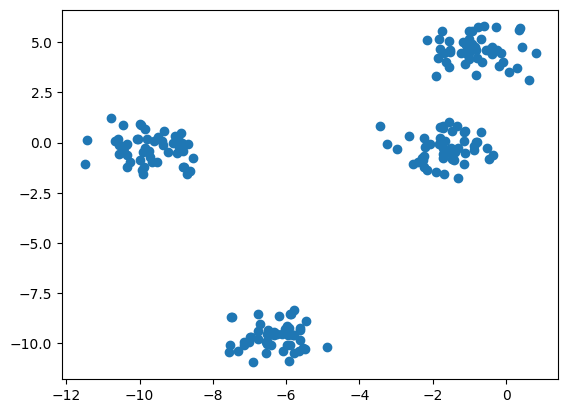

In [ ]:
plt.scatter(Blobs[:,0],Blobs[:,1]);

[[-6.31860465 -9.64913951]
 [-1.66558908 -0.26591973]
 [-9.73154237 -0.29455177]
 [-0.81172191  4.60272926]]


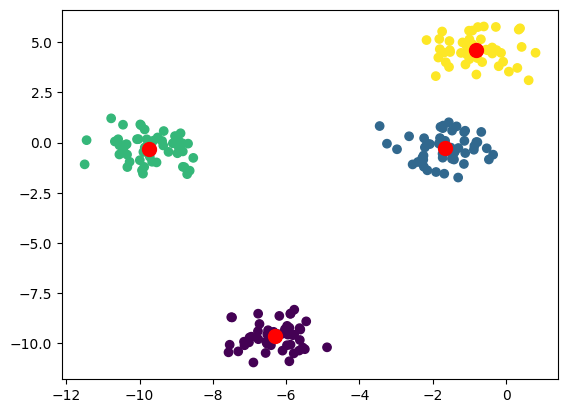

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(number_of_centers)
#model = KMeans(number_of_centers +3)
model.fit(Blobs)


print(model.cluster_centers_) # координаты
#Отобразим полученные кластеры и их центры
plt.scatter(Blobs[:, 0], Blobs[:, 1], c = model.labels_);
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, color = "red");

# считает колво кластеров методом локтя
# - пока сумма квадратичных расстояний между центрами не будет сильно изменяться

# 3. Опишите метрику для проверки качества алгоритмов регрессии.

Mean absolute error, средняя абсолютная ошибка - измеряет среднее абсолютное отклонение предсказанных значений от фактических. Менее чувствительна к выбросам, чем MSE

Mean Squared Error, MSE или среднеквадратическим отклонением - измеряет среднее значение квадратов ошибок. Более чувствительна к выбросам.

Корень из среднеквадратичной ошибки - является квадратным корнем из MSE и возвращает ошибку в тех же единицах, что и целевая переменная. Это делает интерпретацию более удобной.

Коэффициент детерминаци - показывает, какая доля дисперсии зависимой переменной объясняется моделью.

# 4. Опишите технологию работы с категориальными признакми. Привидите примеры.

Существуют разные способы кодирования категориальных признаков:

1) Простейший кодировщий sklearn.preprocessing.LabelEncoder, который каждой категории сопоставляет некоторое целое число (собственно, номер категории).

2) get dummies - метод класса

Метод принимает категориальную переменную в качестве аргумента. Далее создает новую переменную для каждой категории, так что каждая фиктивная переменная содержит данные 1 или 0. 1 - указывает на наличие определенной категории и 0 - указывает на отсутствие этой категории.

3) Кодировщик библиотеки Sklearn from sklearn.preprocessing import OneHotEncoder

Основное отличие - это кодировщик, т.е. это некоторая модель которая обучилась на данных, запомнила словарь и т.д., дальше может быть с этими параметры применяться к другому набору данных, к новым данным например.
